In [1]:
import pandas as pd 

df = pd.read_csv('emails.csv')
df.head()

,Spam,Message
0,0,Please call me at 8
1,1,Free money is available for you
2,0,I study he studies they are students I studied...
3,1,I am working at office now to 9 evening
4,0,U dun say so early hor... U c already then say...


In [2]:
import nltk

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ahmed.habib\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ahmed.habib\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ahmed.habib\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
text = 'Hi: I am working on spam classification'
tokens = word_tokenize(text.lower())
print(tokens)

['hi', ':', 'i', 'am', 'working', 'on', 'spam', 'classification']


In [4]:
import string
tokens = [token for token in tokens if token not in string.punctuation]
print(tokens)

['hi', 'i', 'am', 'working', 'on', 'spam', 'classification']


In [5]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [6]:
stop_words = stopwords.words('english')
tokens = [token for token in tokens if token not in stop_words]
print(tokens)

['hi', 'working', 'spam', 'classification']


In [7]:
print(stop_words)
print(len(stop_words))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [8]:
stemmer = PorterStemmer()
tokens = [stemmer.stem(token) for token in tokens]
print(tokens)


['hi', 'work', 'spam', 'classif']


In [9]:
ps = PorterStemmer()

print(ps.stem("computer"))
print(ps.stem("computation"))
print(ps.stem("compute"))
print(ps.stem("computed"))
print(ps.stem("computers"))

comput
comput
comput
comput
comput


In [10]:
import re
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in string.punctuation]
    stop_words = stopwords.words('english')
    tokens = [token for token in tokens if token not in stop_words]
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    preprocess_text = ' '.join(tokens)
    preprocess_text = re.sub(r'http\S+|www\S+', '', preprocess_text)
    preprocess_text = re.sub(r'\d+', '', preprocess_text)
    return preprocess_text

In [11]:
email = "Hello! These are 5678 examples of emails for spam classification. "
preprocessed_email = preprocess_text(email)
print(preprocessed_email)

hello  exampl email spam classif


In [12]:
df['processed_Message'] = df['Message'].apply(preprocess_text)
df

,Spam,Message,processed_Message
0,0,Please call me at 8,pleas call
1,1,Free money is available for you,free money avail
2,0,I study he studies they are students I studied...,studi studi student studi yesterday
3,1,I am working at office now to 9 evening,work offic even
4,0,U dun say so early hor... U c already then say...,u dun say earli hor ... u c alreadi say ...
...,...,...,...
5222,0,"It‘s reassuring, in this crazy world.",‘ reassur crazi world
5223,0,Oh... Okie lor...We go on sat...,oh ... oki lor ... go sat ...
5224,1,You are awarded a SiPix Digital Camera! call 0...,award sipix digit camera call landlin deliver...
5225,0,"Hey chief, can you give me a bell when you get...",hey chief give bell get need talk royal visit ...


In [13]:
df_spam = df[df['Spam']==1]

In [14]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


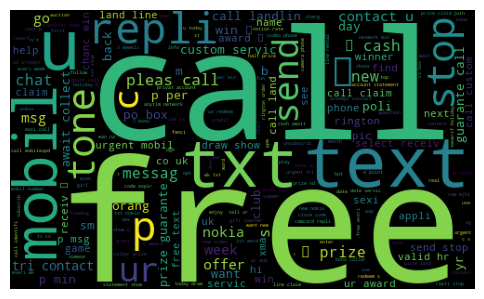

In [15]:
import matplotlib.pyplot as plt

from wordcloud import WordCloud

spam_words_list = df_spam['processed_Message'].astype(str)
spam_words_str = ' '.join(spam_words_list)
spam_wordcloud = WordCloud(width=500, height=300).generate(spam_words_str)
plt.figure(figsize=(6, 4))
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.show()

In [16]:

from sklearn.feature_extraction.text import CountVectorizer

documnets = [
    "My cat and dog sat on the mat",
    "strange cat jumped over the mat",
    "His cat ate the mouse ran across the mat",
    "Her dog run after my cat and mouse",
]
max_features = 6
count_vectorizer = CountVectorizer(max_features=max_features)
vectors = count_vectorizer.fit_transform(documnets)

print(vectors)

  (0, 4)	1
  (0, 0)	1
  (0, 1)	1
  (0, 5)	1
  (0, 2)	1
  (1, 0)	1
  (1, 5)	1
  (1, 2)	1
  (2, 0)	1
  (2, 5)	2
  (2, 2)	1
  (2, 3)	1
  (3, 4)	1
  (3, 0)	1
  (3, 1)	1
  (3, 3)	1


In [17]:
feature_names = count_vectorizer.get_feature_names_out()
print('feature_names')
print(feature_names)

feature_names
['cat' 'dog' 'mat' 'mouse' 'my' 'the']


In [18]:
print(vectors.toarray())

[[1 1 1 0 1 1]
 [1 0 1 0 0 1]
 [1 0 1 1 0 2]
 [1 1 0 1 1 0]]


In [19]:
example_df = pd.DataFrame(data=vectors.toarray(), columns=feature_names)
print(example_df)

   cat  dog  mat  mouse  my  the
0    1    1    1      0   1    1
1    1    0    1      0   0    1
2    1    0    1      1   0    2
3    1    1    0      1   1    0


In [20]:
frequencies = vectors.toarray().sum(axis=0)
sorted_indices = frequencies.argsort()[::-1]
sorted_feature_names = [feature_names[idx] for idx in sorted_indices]
sorted_frequencies = frequencies[sorted_indices]
for i in range(len(sorted_feature_names)): 
    print(sorted_feature_names[i], ": ", sorted_frequencies[i])

the :  4
cat :  4
mat :  3
my :  2
mouse :  2
dog :  2


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=max_features)
tfidf_vectors = tfidf_vectorizer.fit_transform(documnets)
print('\n TF-IDF Vectorization')
feature_names = tfidf_vectorizer.get_feature_names_out()
example_df = pd.DataFrame(data=tfidf_vectors.toarray(), columns=feature_names)
example_df


 TF-IDF Vectorization


,cat,dog,mat,mouse,my,the
0,0.341846,0.516470,0.418127,0.000000,0.516470,0.418127
1,0.500491,0.000000,0.612172,0.000000,0.000000,0.612172
2,0.304813,0.000000,0.372830,0.460519,0.000000,0.745660
3,0.356966,0.539313,0.000000,0.539313,0.539313,0.000000


In [22]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
corpus = df['processed_Message']

max_features = 100
count_vectorizer = CountVectorizer(max_features=max_features)
vectors = count_vectorizer.fit_transform(corpus)
tfidf_vectorizer = TfidfVectorizer(max_features=max_features)
tfidf_vectors = tfidf_vectorizer.fit_transform(corpus)


In [23]:
from sklearn.model_selection import train_test_split
x = vectors
y = df['Spam']
x = x.toarray()
x_train, x_test , y_train , y_test = train_test_split(x,y, random_state=42)


In [24]:
from sklearn.metrics import accuracy_score 
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10


C:\Users\ahmed.habib\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8388 - loss: 0.5052
Epoch 2/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9507 - loss: 0.1625
Epoch 3/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9582 - loss: 0.1176
Epoch 4/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9637 - loss: 0.1055
Epoch 5/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9654 - loss: 0.0995
Epoch 6/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9719 - loss: 0.0912
Epoch 7/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9722 - loss: 0.0891
Epoch 8/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9763 - loss: 0.0801
Epoch 9/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9733 - loss: 0.0807
Epoch 10/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9746 - loss: 0.0773


In [25]:
import numpy as np

y_pred_prob = model.predict(x_test)
y_pred = np.round(y_pred_prob)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy*100,2))

message="call to get free prize one million dollars"

processed_message=preprocess_text(message)

vector=tfidf_vectorizer.transform([processed_message])
vector_dense=vector.toarray()

y_pred_prob = model.predict(vector_dense)

y_pred = np.round(y_pred_prob)
print(y_pred)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Accuracy: 97.02
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
[[1.]]


In [26]:
x = tfidf_vectors
y = df['Spam']
x = x.toarray()
x_train, x_test , y_train , y_test = train_test_split(x,y, random_state=42)

model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=32)
y_pred_prob = model.predict(x_test)
y_pred = np.round(y_pred_prob)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy*100,2))

message="call to get free prize one million dollars"

processed_message=preprocess_text(message)

vector=tfidf_vectorizer.transform([processed_message])
vector_dense=vector.toarray()

y_pred_prob = model.predict(vector_dense)

y_pred = np.round(y_pred_prob)
print(y_pred)

C:\Users\ahmed.habib\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8068 - loss: 0.5553
Epoch 2/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8978 - loss: 0.2184
Epoch 3/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9552 - loss: 0.1366
Epoch 4/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9574 - loss: 0.1386
Epoch 5/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9604 - loss: 0.1259
Epoch 6/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9618 - loss: 0.1180
Epoch 7/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9654 - loss: 0.1145
Epoch 8/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9702 - loss: 0.0966
Epoch 9/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9732 - loss: 0.0811
Epoch 10/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9726 - loss: 0.0852
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 96.71
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[1.]]
